<a href="https://colab.research.google.com/github/datagrad/DataScience-Projects/blob/main/Linear_Regression_bike_sharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkred"><u><center> **Linear Regression -  Bike Sharing Assignment**


# <span style="color:IndianRed ;">1. Project Requirement and Artifacts

####**Bike-sharing Service**
The bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free.
Many bike share systems allow people to borrow a bike from a computer-controlled dock, where a user can enter the payment information for the system to unlock it. The user can further return the bike to any other computer-controlled dock belonging to the same system.


####**Case of BoomBikes**
BoomBikes is a US-based bike-sharing provider. It has recently suffered considerable dips in its revenues due to the ongoing Corona pandemic and is finding it very difficult to sustain itself in the current market scenario.
They have decided to align their future business with a Machine Learning based model to recover from the current business scenario once lockdown ends. They aspire to understand the demand for shared bikes among the people after the quarantine situation ends.
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



####**Project Goal**
With this project, we will try:
1.	To understand the factors on which the demand for these shared bikes depends.
2.	To identify the variables that are significant in predicting the demand for shared bikes.
3.	To understand how well a variable describes the bike demands if a Variable is significant.

####**Business Goal:**
With this Machine Learning project, we will try to model the demand for shared bikes with the available independent variables.

This model can be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# <span style="color:IndianRed ;">2. Import all necessary libraries

In [81]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#import train test library from sklearn
from sklearn.model_selection import train_test_split

# Import minmax scaler
from sklearn.preprocessing import MinMaxScaler

#Import required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Import the statsmodels library
import statsmodels.api as sm  

# Import statsmodels library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Connect the data from Drive (To Be Deleted)

In [84]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# <span style="color:IndianRed ;">3. Import, Read and Understand the Data

####Import and Read the Data

In [85]:
# Read teh CSV data file
bikedata = pd.read_csv("/content/gdrive/My Drive/day.csv")
#bikedata = pd.read_csv("day.csv")   for jupyter

bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


####Inspect the various aspects of the dataframe

In [86]:
bikedata.shape

(730, 16)

There are 730 rows and 16 columns in dataset

####Info

In [87]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


####Unique Counts in each column

In [88]:
#Unique Values to identify variable type
bikedata.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

####Describe the data

In [89]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Data Insights:**


1.   There are no column with null value.
2.   The `dteday` is in object type and needs to be converted to `datetime data type`.
3.   All the column data type is either `int` or `float` as per info tab, but `nunique()` indicates that:
  *   	7 Columns are actually object type data (`yr`, `holiday`, `workingday`, `weathersit`, `season`, `weekday`, `mnth`),
  *   	8 Columns are of numerical data type,
  *   	1 column is of datetime data type.

4.   The `describe` function indicates a consistent pattern for all the Numerical Variables.

**Categorical variable:**
- `yr`
- `holiday`
- `workingday`
- `weathersit`
- `season`
- `weekday`
- `mnth`

We will create `dummy variables` for few of these Categorical variables in the cleaning stage.

**Numerical variable:**
- `temp`
- `hum`
- `casual`
- `windspeed`
- `registered`
- `atemp`
- `cnt`
- `instant`
- `dteday`

As mentioned in the problem statement `cnt` is our target variable which is a agregation of `casual` and `registered` columns, and hence both can be dropped (but after confirming the collinearity).

# <span style="color:IndianRed ;">4. Clean and Visualize the Data

#### Data type  Conversion
Convert the data type of dteday from object to date.


In [90]:
bikedata['dteday'] = bikedata['dteday'].astype('datetime64') 
bikedata['dteday']

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

#### Data Visualisation

**Understanding the data through visualization**.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- With this we will try to identify if some predictors directly have a strong association with the outcome variable.
- Also we will try to identify if some predictors directly have a strong association with another predictor.

We'll visualise our data using `matplotlib` and `seaborn`.


**Steps:** <br/>

4.1.   Univariate
  - Dist Plot for Numerical
  - Give insight  

4.2.   Visualizing Categorical Variable
  - Box plot
  - Give Insight

#### <span style="color:RoyalBlue ;">Distplot for Univariate Analysis of Numerical Variables

<function matplotlib.pyplot.show>

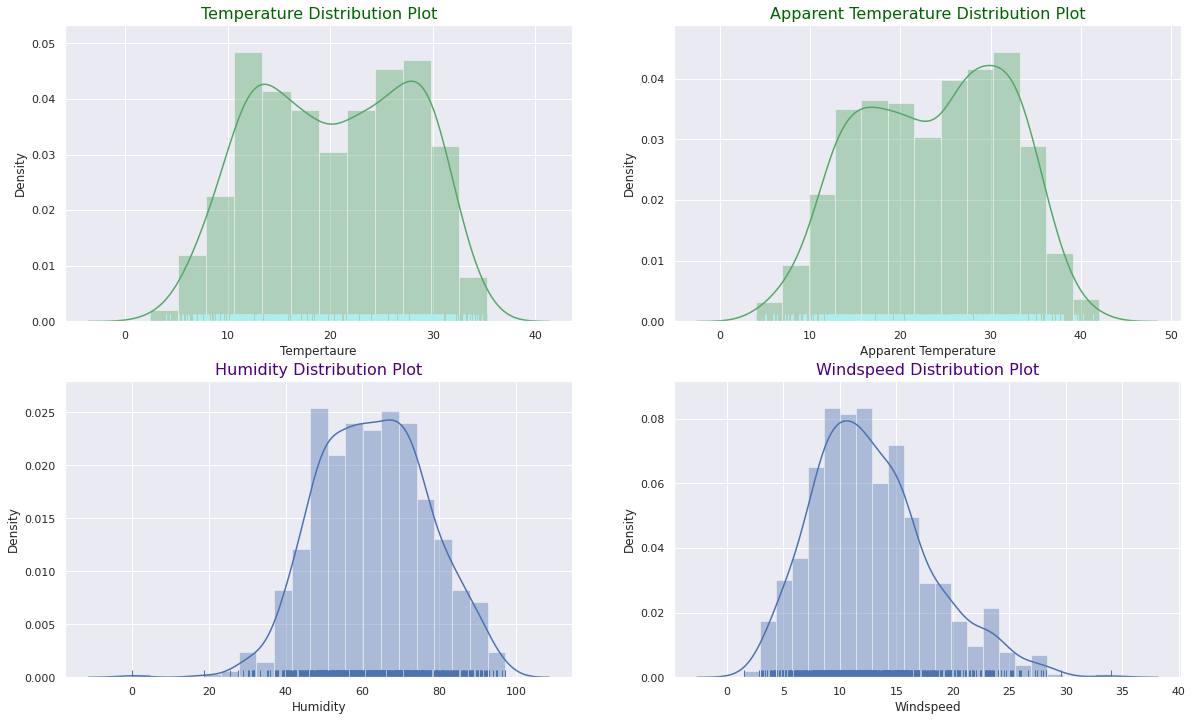

In [91]:
plt.figure(figsize=(20, 12))


plt.subplot(2,2,1)
sns.distplot(bikedata.temp, rug=True,rug_kws={"color": "paleturquoise"} ,axlabel = "Tempertaure",color= "g")
plt.title("Temperature Distribution Plot", fontsize=16, color= "darkgreen")
plt.show

plt.subplot(2,2,2)
sns.distplot(bikedata.atemp, rug=True,rug_kws={"color": "paleturquoise"}, axlabel = "Apparent Temperature",color= "g")
plt.title("Apparent Temperature Distribution Plot", fontsize=16, color= "darkgreen")
plt.show

plt.subplot(2,2,3)
sns.distplot(bikedata.hum, rug=True,rug_kws={"color": "b"}, axlabel = "Humidity",color= "b")
plt.title("Humidity Distribution Plot", fontsize=16, color= "indigo")
plt.show

plt.subplot(2,2,4)
sns.distplot(bikedata.windspeed, rug=True,rug_kws={"color": "b"}, axlabel = "Windspeed",color= "b")
plt.title("Windspeed Distribution Plot", fontsize=16, color= "indigo")
plt.show

#####**Insights:**
*   All the Numerical Variables are Uniformly distributed as the distribution plot and rug indicates.

#### <span style="color:RoyalBlue ;">View categorical data using box plot


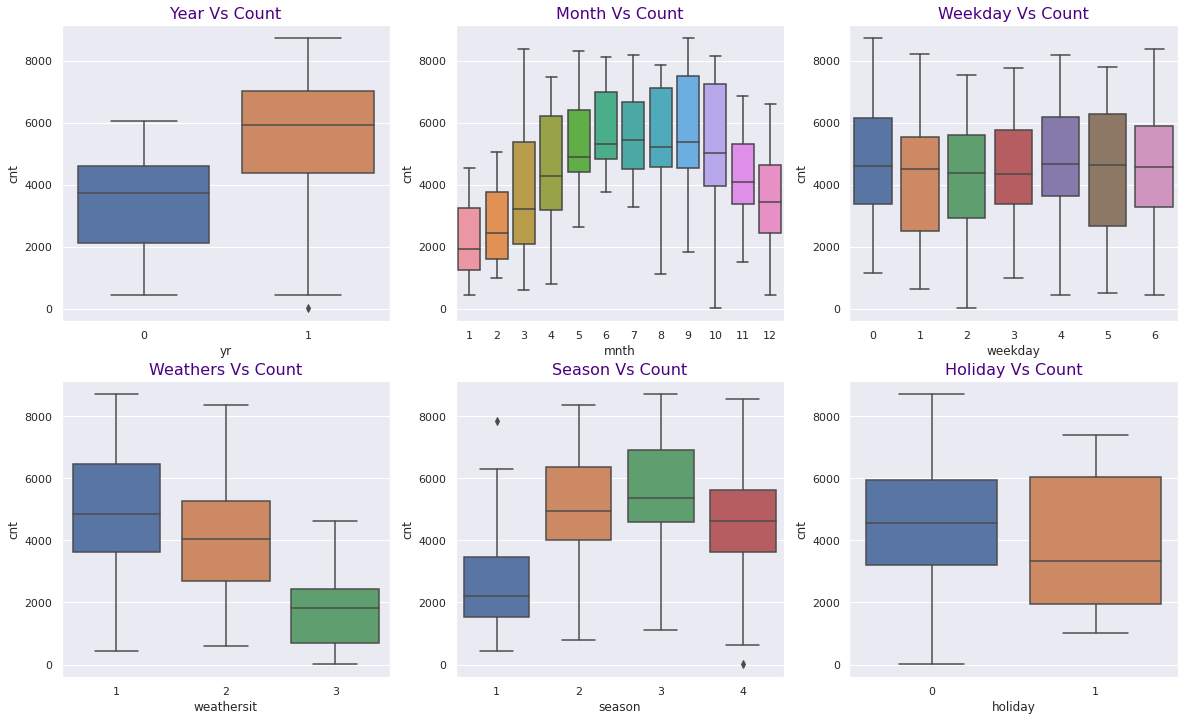

In [92]:
#categorical data consistency check using box plot

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata)
plt.title("Year Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedata)
plt.title("Month Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)
plt.title("Weekday Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata)
plt.title("Weathers Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata)
plt.title("Season Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedata)
plt.title("Holiday Vs Count", fontsize=16, color= "indigo")

plt.show()

#####**Insights:**

*   The Count of customers have increased well in 2019 as compared to 2018.
*   The count of customer is relatively higher in the mid-year months, that are majorly in the summer and fall seasons.
*   The count of bookings are spread simmilarlry across all the seven days of week.
*   If weather is Clear, the count is relatively higher then those in Misty Weather, while the booking falls in rainy weather.


#### <span style="color:RoyalBlue ;"> Pairplot to check Correlation between the variables

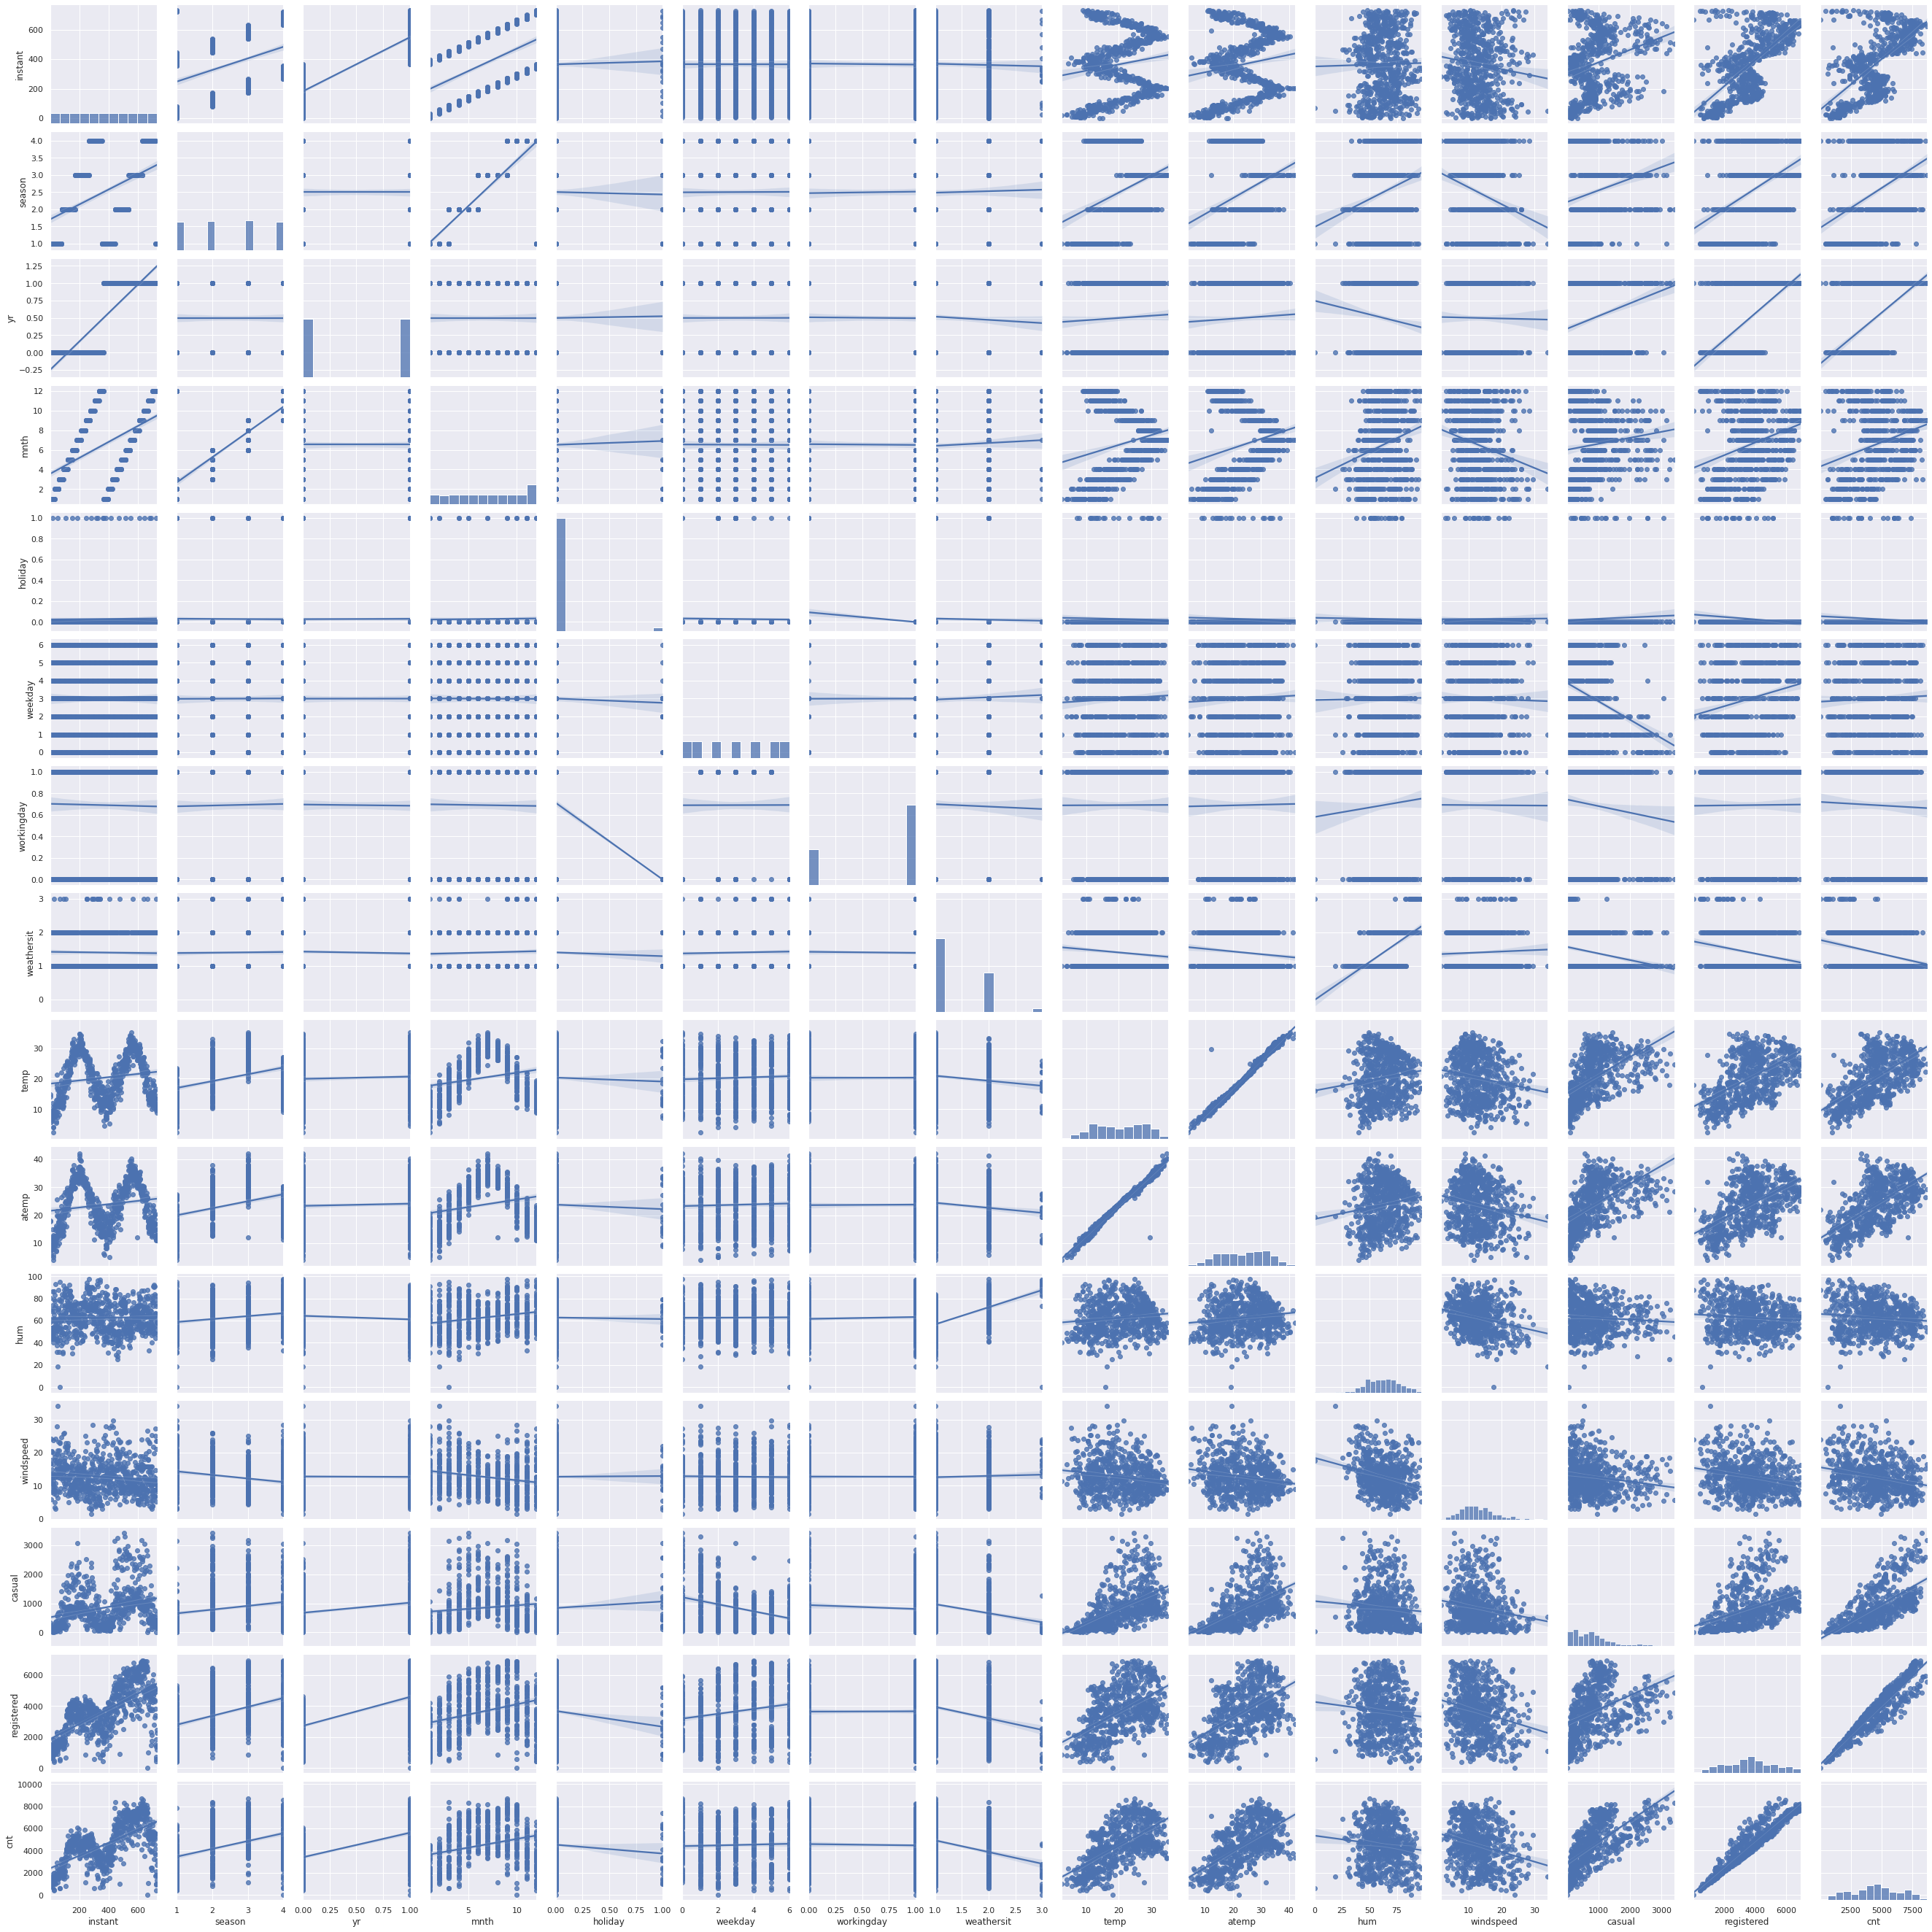

In [93]:
#pairplot between all the variables
sns.set_theme(style="darkgrid")
sns.pairplot(bikedata,kind="reg")
plt.show()

####Heatmap

Heatmap to see the exact value of correlation

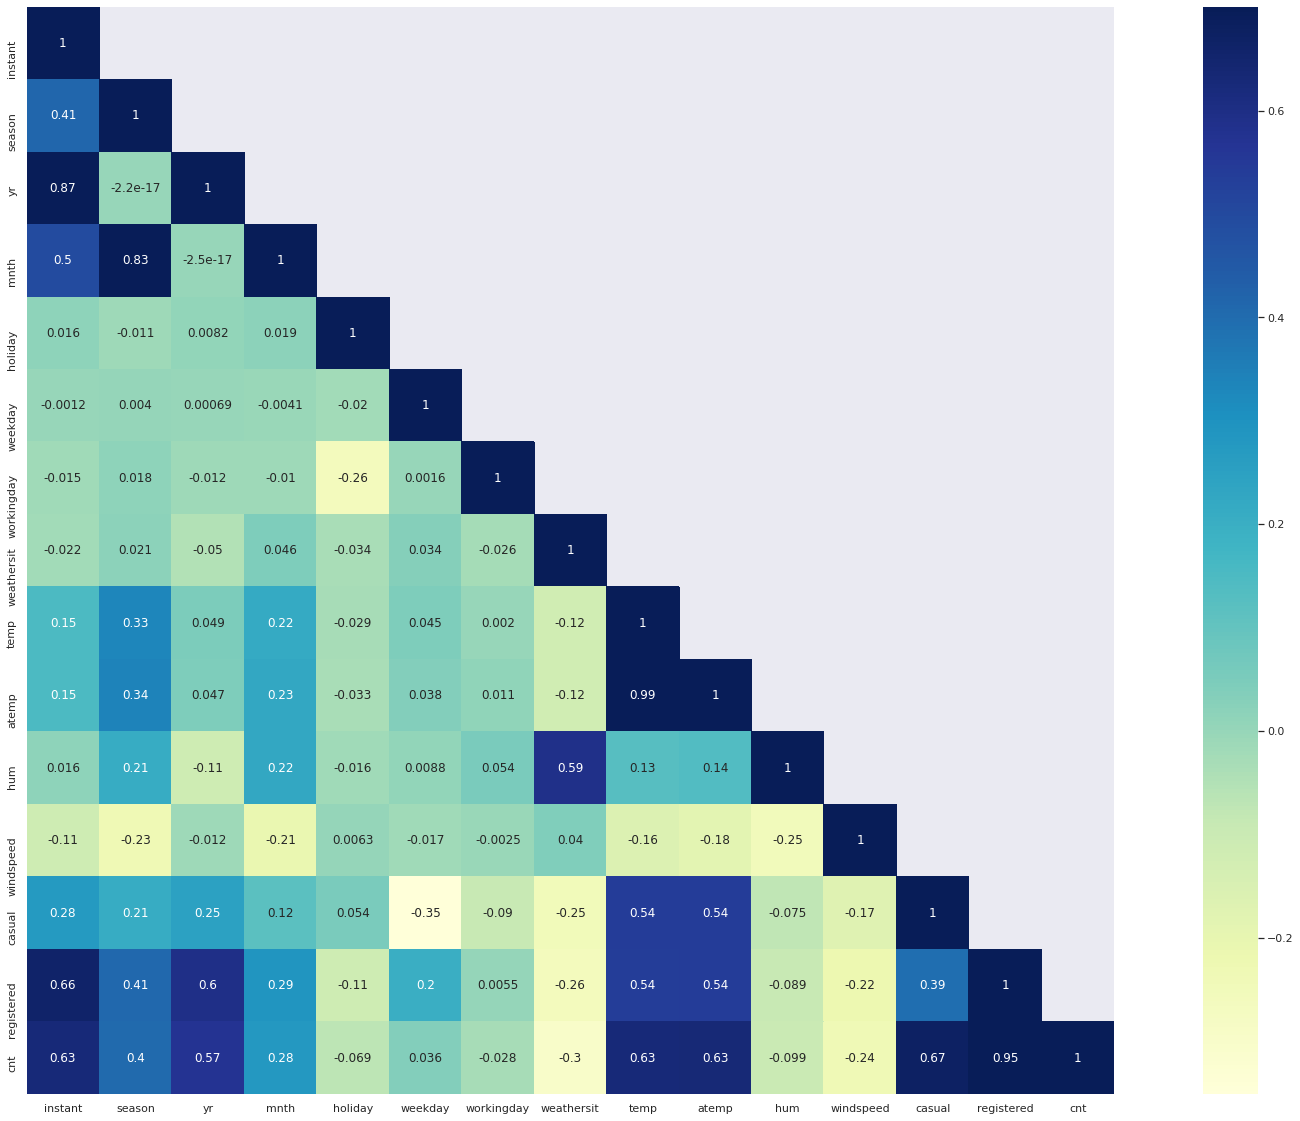

In [94]:
plt.figure(figsize=(32,20))

mask = np.array(bikedata.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikedata.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "YlGnBu");


Based on the sets of pairplot, the heatmap, and understanding of the data:
*   `Instant` collumn doesn't have any implication on the `cnt`, and can be dropped.
*   The `dteday` collumn doesn't have any extra implication on the `cnt` as data already has year, month, and week column to give a better insight, and hence `dteday` can be dropped.
*   The correlation between `temp` and `atemp` is high (0.99), and they are simmilarly correlated with `cnt`, so one of them can be dropped. We can drop `atemp`.
*   The sum of the count of `casual` and `registered` is equal to total count i.e. `cnt`, and hence both can be dropped directly
*   `mnth` and `season` clm highly correlated (0.83), and hence one of these can be dropped. It is also supported by the fact that season mostly changes with mnth. Hence mnth collumn can be dropped. But we will wait for the correlation between created dummy columns to obtain a more better result.

####Drop the Decided Variables 

So, lets drop the following Variables based on above conclusions:

*   instant
*   dteday
*   atemp
*   casual
*   registered

In [95]:
bikedata.drop(['instant', 'dteday','casual', 'registered',"atemp"],axis=1,inplace=True)

In [96]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### <span style="color:RoyalBlue ;">Recheck the Collinearity

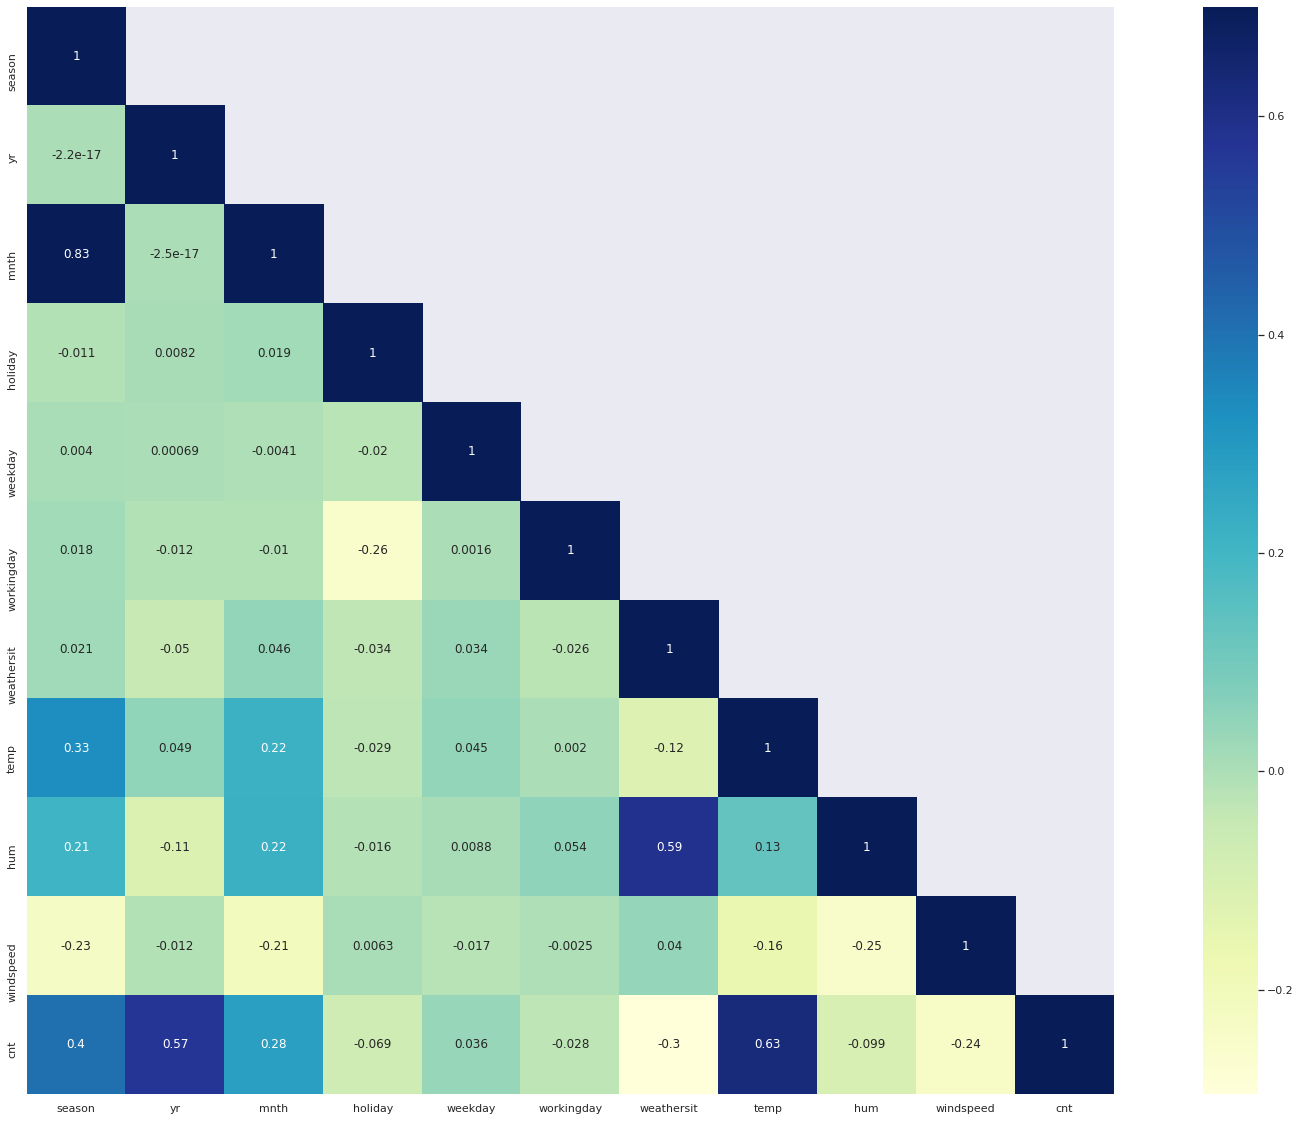

In [97]:
#Recheck the Collinearity of remaining variables
plt.figure(figsize=(32,20))

mask = np.array(bikedata.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikedata.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "YlGnBu");


# <span style="color:IndianRed ;">5. Dummy Creation

####Prepare the Data for dummyfication

**Step 1:**

*   Now, we need to ensure that All the categorical variable in the dataset has has its value in terms of binary (1 and 0). Here are the four such variables:
    *   `weathersit`
    *   `season`
    *   `weekend`
    *   `mnth`

**Step 2:**
- Change these categorical variable from integer data type to string, so that can be converted to Dummy variables

In [98]:
#Replace weathersit values
bikedata.weathersit.replace({1:"Clear",2: "MistyWeather", 3: "LightRain",4:"HeavyRain"},inplace=True)

#Replace season values
bikedata.season.replace({1:"Spring",2:"Summer", 3:"Fall", 4:"Winter"},inplace=True)

#Replace weekday values
bikedata.weekday.replace({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'},inplace=True)

#Replace mnth values
bikedata.mnth.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

In [99]:
#count values 
print(bikedata.weathersit.value_counts())
print ("*"*75)
#Replace season values
print(bikedata.season.value_counts())
print ("*"*75)

#Replace weekday values
print(bikedata.weekday.value_counts())
print ("*"*75)

print(bikedata.mnth.value_counts())
print ("*"*75)


Clear           463
MistyWeather    246
LightRain        21
Name: weathersit, dtype: int64
***************************************************************************
Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
***************************************************************************
Tue     105
Mon     105
Fri     104
Sun     104
Sat     104
Wed     104
Thur    104
Name: weekday, dtype: int64
***************************************************************************
Aug    62
Oct    62
Mar    62
Jan    62
Jul    62
May    62
Dec    62
Nov    60
Jun    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64
***************************************************************************


So, it is converted, and now we can dummify these columns

####Create Dummy for applicable categorical columns

In [100]:
# Create a dataset with all the variables which needs dummy data creation
bikedata_dummy=bikedata[['weekday','season','weathersit', 'mnth']]


In [101]:
# Create dummies
dummy=pd.get_dummies(bikedata_dummy, drop_first=True)

In [102]:
# Verify
dummy.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [103]:
# concat the bikedata with the dummy dataset
bikedata=pd.concat([dummy, bikedata],axis=1)

####Drop the weekday, season and weathersit columns

In [104]:
#Drop the columns for which we have already created dummy variables
bikedata.drop(['weekday','season','weathersit', 'mnth'],axis=1,inplace=True)

###Finalised Dataset

In [105]:
#Verify the Finalised Dataset
bikedata.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# <span style="color:IndianRed ;">6. Split the data into train and test

In [106]:
#Split the dataset in to train and test
df_train, df_test = train_test_split(bikedata,train_size=0.7,random_state=100 )
print ("Shape of Train Data: ", df_train.shape)
print ("Shape of Test Data: ", df_test.shape)


Shape of Train Data:  (510, 29)
Shape of Test Data:  (220, 29)


In [107]:
# verify the train dataset
df_train.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,16.980847,62.1250,10.792293,4066
728,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15.443347,48.9583,8.708325,4220
111,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.803347,72.9583,14.707907,1683


In [108]:
# Verify test dataset
df_test.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19.270000,81.2917,13.250121,2659
221,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,29.315000,30.5000,19.583229,4968


In [109]:
# check the numerical description for train dataset
df_train.describe()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255
std,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


In [110]:
# Verify the total columns in bikedataset
bikedata.shape , bikedata.columns

((730, 29), Index(['weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
        'weekday_Tue', 'weekday_Wed', 'season_Spring', 'season_Summer',
        'season_Winter', 'weathersit_LightRain', 'weathersit_MistyWeather',
        'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
        'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr',
        'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
       dtype='object'))

# <span style="color:IndianRed ;">7. Rescaling the Variables 


It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will be use MinMax scaling process.
Note that the scaling doesn't impact our model.

This is done in three steps:


1.   Create a scalar with empty object 
2.   Create the list of Numerical Variables to be scalarized
3.   fit the scalar transformation on data


In [111]:
# Instantiate an object
scaler = MinMaxScaler()
 
# Create the list of Numeric Variables to be scaled
num_vars = ['temp','hum','windspeed']
 
#fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed
576,0.815169,0.725633,0.264686
426,0.442393,0.640189,0.255342
728,0.245101,0.498067,0.663106
482,0.395666,0.504508,0.188475
111,0.345824,0.751824,0.380981


In [112]:
# check the description after scaling
df_train[num_vars].describe()

,temp,hum,windspeed
count,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883
std,0.225858,0.145846,0.169803
min,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179
50%,0.542596,0.653714,0.296763
75%,0.735215,0.754830,0.414447
max,1.000000,1.000000,1.000000


So, the result of scaling is evident from the description, the values are now mapped between 0 and 1.

In [113]:
#check the training data
df_train.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,7216
426,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.442393,0.640189,0.255342,4066
728,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106,1796
482,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.395666,0.504508,0.188475,4220
111,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.345824,0.751824,0.380981,1683


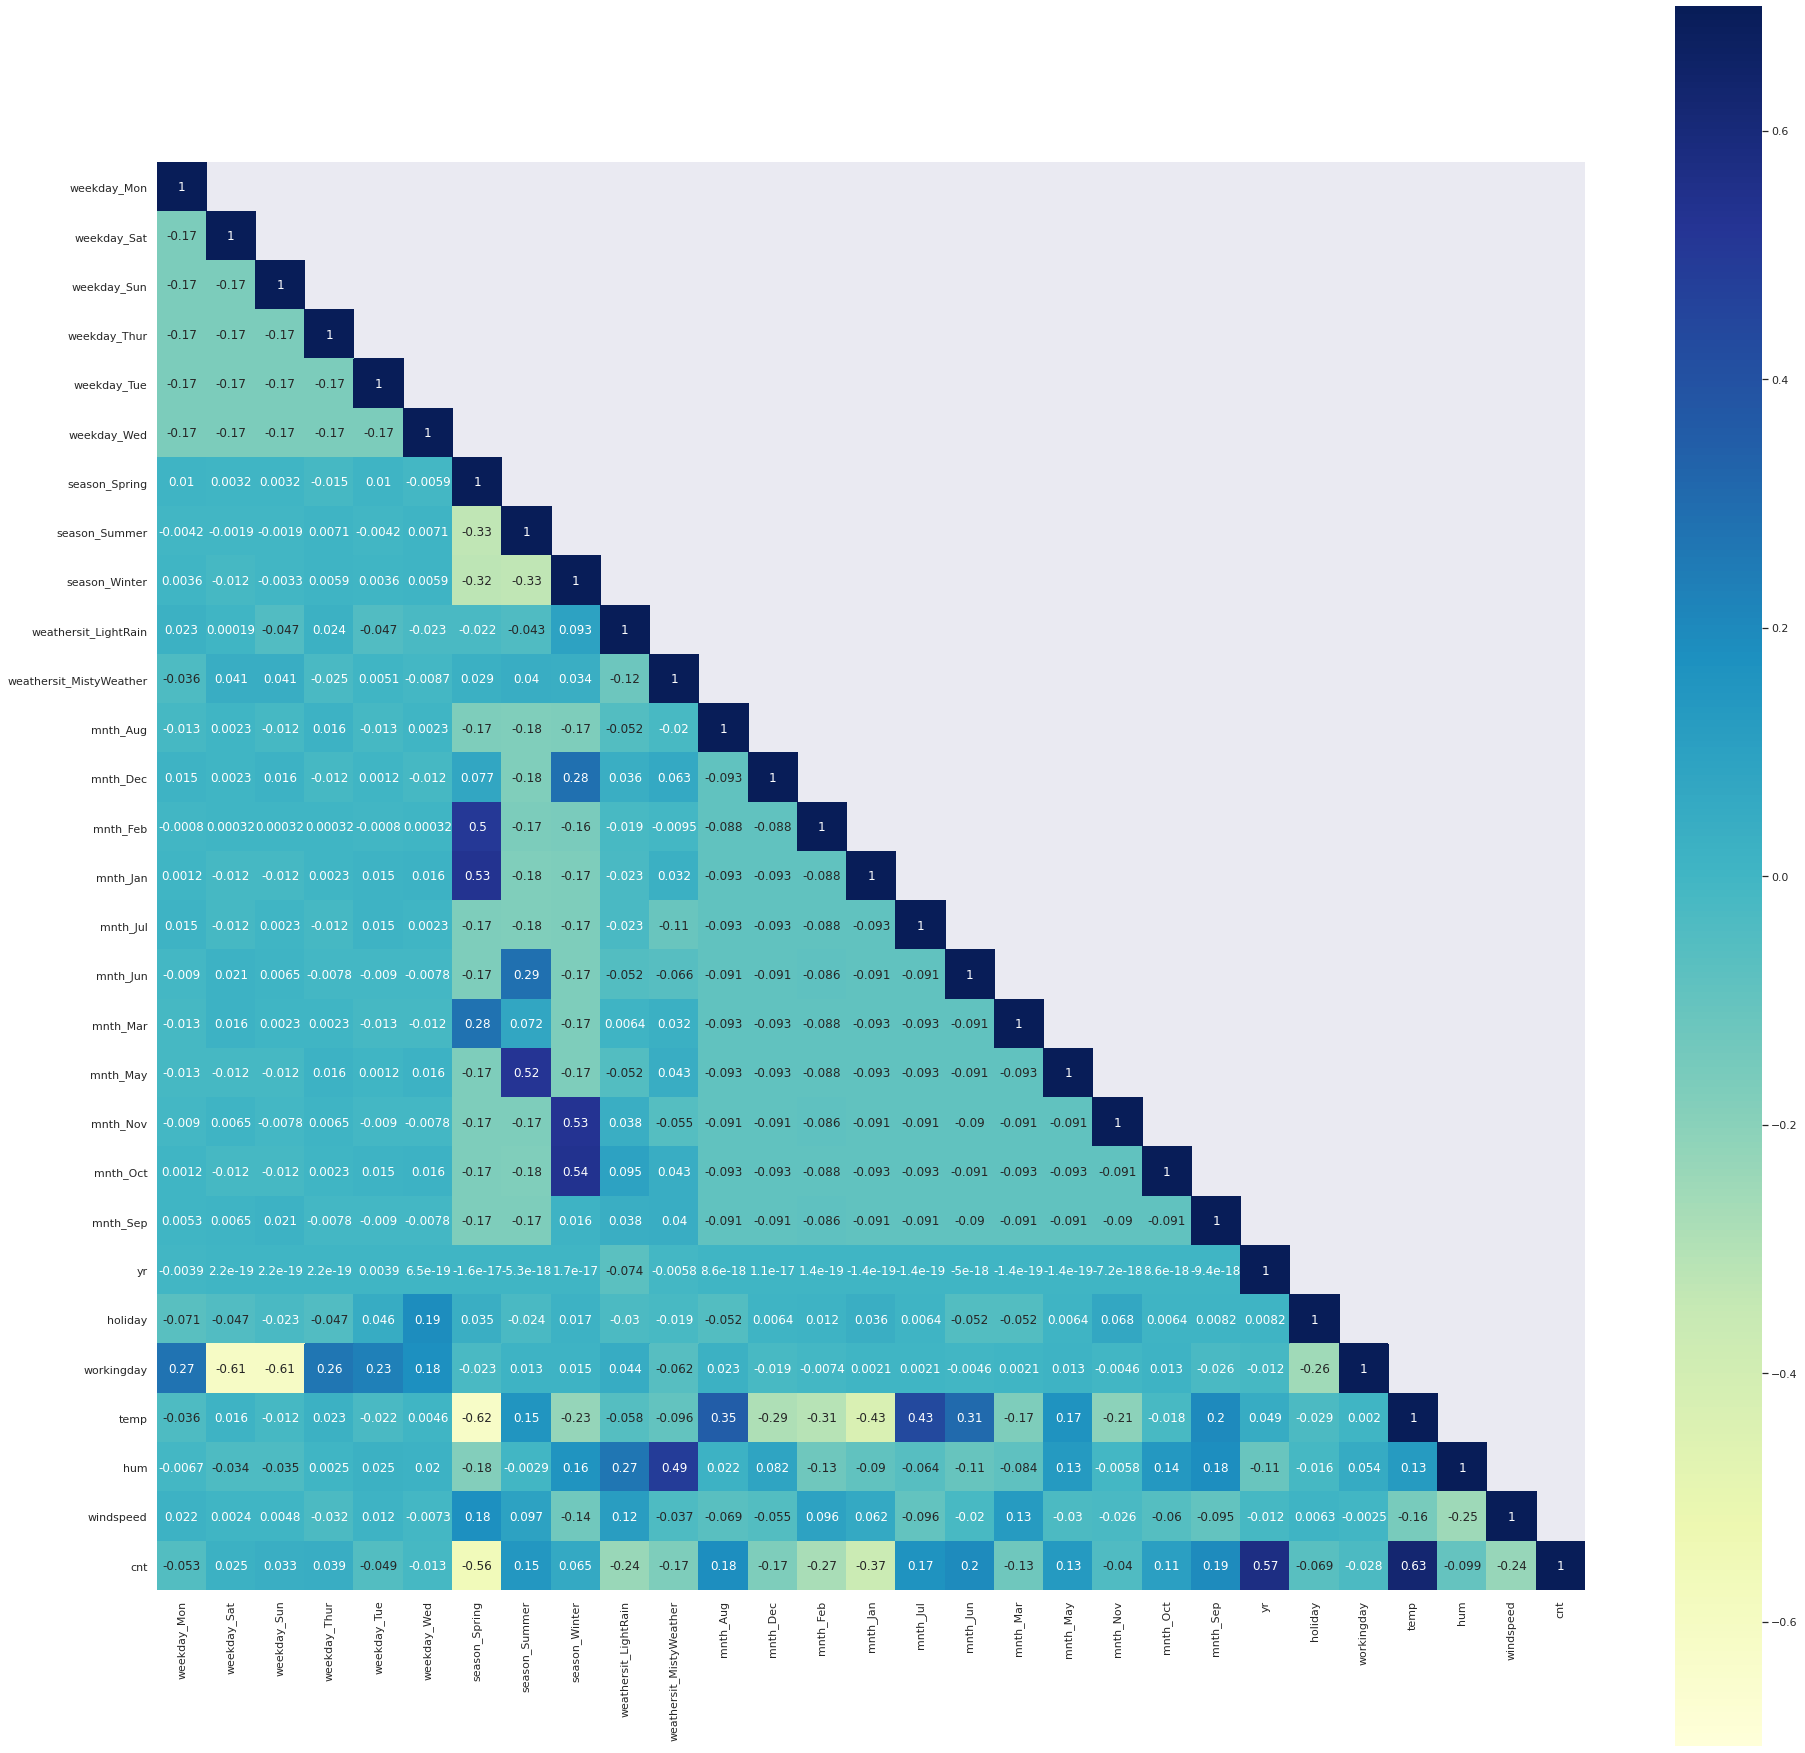

In [114]:
#plotting the heatmap to identify the correlation
plt.figure(figsize=(32,32))


mask = np.array(bikedata.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikedata.corr(), mask=mask, vmax=.7,vmin=-.7, square=True, annot=True, cmap = "YlGnBu");


# <span style="color:IndianRed ;">8. Model building
Fit a regression line through the training data using `statsmodels`.

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Steps of Model Building Phase:** 
We will be using Recursive Feature Elimination method to crete this machine leaning Model. This is done basically in 3 recursive steps: Create the model, Validate the summary to identify the correlated variables and insignificant variables, and drop the Variables based on validation. The steps are repeated until we get an efficient model.

1.   Create a Machine Learning Model lr_n* using OLS, taking X_train as the constant source, where n will be the respective model number. 
2.   Print summary of the newly created model, and analyse the summery. Keep relatively higher focus on p- value and constant collumn.
3.   Check for the VIF values of the feature variables using variance_inflation_factor from the statsmodels.
4.   Check the variables for which p>0.05 and VIF>5, drop one such variable at once.
5.   Repeat the Step 1 to step 4, until we get p < 0.05 and VIF < 5 for all the variables. (Both these values can varry depending on project requirement and human intuition)

**About p-value**
The p-values determines the significance level of the variable to the model. Higher the absolute p-value, lesser is the significance level.

We can simply drop the variable with the highest (i.e. non-significant) p-value. A better way would be to supplement this with the VIF information. 

**Checking VIF**

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

### <span style="color:RoyalBlue ;">Divide training dataset into X and y sets

In [116]:
#Predictor Variable
y_train = df_train.pop('cnt')

#Target Variable
X_train = df_train

In [117]:
y_train.shape

(510,)

In [118]:
# Check all the columns of the dataframe
bikedata.columns

Index(['weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_LightRain', 'weathersit_MistyWeather',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

##Recursive Feature Elimination (RFE)

In [119]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)


In [120]:
# Check the details of rfe to understand which features should be choosen in top 20 predicter variable
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 8),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 5),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_LightRain', True, 1),
 ('weathersit_MistyWeather', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [121]:
# view the column choosed by RFE
X_train.columns[rfe.support_]


Index(['weekday_Sat', 'weekday_Sun', 'weekday_Tue', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_LightRain',
       'weathersit_MistyWeather', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'yr', 'holiday', 'workingday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [122]:
# Create a dataframe with RFE choosen columns
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

,weekday_Sat,weekday_Sun,weekday_Tue,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0.248216,0.577930,0.431816
79,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.462664,0.759870,0.529881


In [123]:
#mport statsmodels for modeling

import statsmodels.api as sm

### 1<sub>st <sup> ML Model

In [124]:
#Build the first linear model
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                      3324.933166
weekday_Sat                -373.321131
weekday_Sun                -321.879911
weekday_Tue                -161.669218
season_Spring              -448.259741
season_Summer               348.826710
season_Winter               888.414709
weathersit_LightRain      -2199.786571
weathersit_MistyWeather    -501.241637
mnth_Dec                   -408.400157
mnth_Feb                   -302.116379
mnth_Jan                   -544.983868
mnth_Jul                   -456.236201
mnth_Nov                   -363.466220
mnth_Sep                    640.263053
yr                         2006.773717
holiday                   -1157.344504
workingday                 -481.039448
temp                       4024.284365
hum                       -1312.324555
windspeed                 -1621.632465
dtype: float64

####Print 1<sub>st <sup> ML Model

In [125]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.90e-185
Time:                        11:58:05   Log-Likelihood:                -4106.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     489   BIC:                             8344.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

####Check VIF of 1<sub>st <sup> ML Model

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,workingday,47.36
18,hum,38.38
17,temp,28.58
1,weekday_Sun,9.58
0,weekday_Sat,9.20
3,season_Spring,7.02
19,windspeed,5.46
5,season_Winter,4.90
4,season_Summer,3.54
10,mnth_Jan,2.54


### 2<sub>nd <sup> ML Model

####Drop a variable

In [127]:
# Dropping highly correlated variables and insignificant variables

X = X_train_rfe.drop('weekday_Sun', 1,)

In [128]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

####Print 2<sub>nd <sup> ML Model

In [129]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.80e-186
Time:                        11:58:06   Log-Likelihood:                -4106.5
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     490   BIC:                             8338.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

####Check VIF of 2<sub>nd <sup> ML Model

In [130]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,hum,32.77
16,temp,19.21
15,workingday,6.19
2,season_Spring,5.59
18,windspeed,4.79
4,season_Winter,4.14
3,season_Summer,2.89
9,mnth_Jan,2.39
6,weathersit_MistyWeather,2.38
13,yr,2.10


### 3<sub>rd <sup> ML Model

####Drop a variable


In [131]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday_Sat', 1)

In [132]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

####Print 3<sub>rd <sup> ML Model

In [133]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.58e-187
Time:                        11:58:06   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     491   BIC:                             8332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

####Check VIF of 3<sub>rd <sup> ML Model

In [134]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,hum,32.46
15,temp,18.56
1,season_Spring,5.48
17,windspeed,4.77
3,season_Winter,4.10
14,workingday,3.92
2,season_Summer,2.85
8,mnth_Jan,2.39
5,weathersit_MistyWeather,2.37
12,yr,2.10


### 4<sub>th <sup> ML Model

####Drop a variable


In [135]:
X = X.drop('mnth_Feb', 1)

In [136]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

####Print 4<sub>th <sup> ML Model

In [137]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          4.29e-188
Time:                        11:58:06   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     492   BIC:                             8328.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2


####Check VIF of 4<sub>th <sup> ML Model

In [138]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,hum,31.89
14,temp,17.99
16,windspeed,4.76
1,season_Spring,4.42
3,season_Winter,4.10
13,workingday,3.91
2,season_Summer,2.85
5,weathersit_MistyWeather,2.37
11,yr,2.09
9,mnth_Nov,1.85


### 5<sub>th <sup> ML Model

####Drop a variable


In [139]:
X = X.drop('weekday_Tue', 1)

In [140]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

####Print 5<sub>th <sup> ML Model

In [141]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.19e-188
Time:                        11:58:06   Log-Likelihood:                -4109.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2


####Check VIF of 5<sub>th <sup> ML Model

In [142]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,hum,31.85
13,temp,17.92
15,windspeed,4.76
0,season_Spring,4.42
2,season_Winter,4.10
12,workingday,3.69
1,season_Summer,2.85
4,weathersit_MistyWeather,2.37
10,yr,2.09
8,mnth_Nov,1.85


### 6<sub>th <sup> ML Model

####Drop a variable

In [143]:
X = X.drop('hum', 1)

In [144]:
# Build the sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

####Print 6<sub>th <sup> ML Model

In [145]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          3.69e-186
Time:                        11:58:06   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     494   BIC:                             8336.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

####Check VIF of 6<sub>th <sup> ML Model

In [146]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,6.11
14,windspeed,4.69
12,workingday,3.58
0,season_Spring,3.08
2,season_Winter,3.08
1,season_Summer,2.33
10,yr,2.07
8,mnth_Nov,1.82
6,mnth_Jan,1.66
7,mnth_Jul,1.59


### Machine Learning Model Insight:

From the summary and the VIF dataframe we can see that, all the variables retained in the model are now significant.
The VIF value of temp is `6.11`, and can be accepted considering temperature is always a factor in deciding to book a bike or not.
The p-value of all variables are below `0.05`, a threshold assumed for this project.

# <span style="color:IndianRed ;">9. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [147]:
#preparing the train set 
y_train_pred_cnt = lr_6.predict(X_train_lm)


Text(0.5, 0, 'Errors')

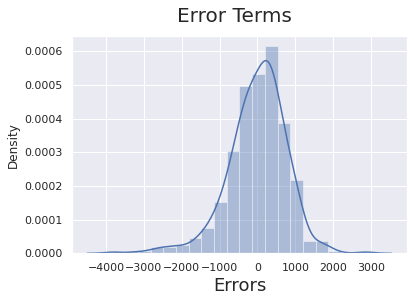

In [148]:
# Plot the histogram of the error terms
fig = plt.figure()

residual = y_train - y_train_pred_cnt


sns.distplot(residual , bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


The error terms are normally distributed

Text(0, 0.5, 'y_trsain_pred')

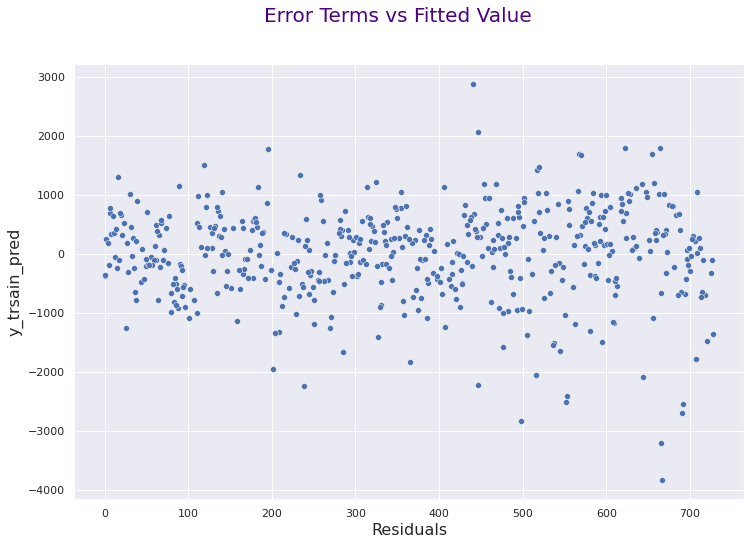

In [149]:
# Lets us check if the error terms are independant

fig = plt.figure(figsize=(12, 8))

sns.scatterplot(data = residual)

fig.suptitle('Error Terms vs Fitted Value', fontsize=20,color= "indigo")
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('y_trsain_pred', fontsize=16)


**Residual Analysis:**
- Error terms are normalized with mean as zero.
- Error terms are independant

# <span style="color:IndianRed ;">10. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [150]:
num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [151]:
df_test.describe()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.254545,0.263636,0.236364,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,4560.559091
std,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.436599,0.441609,0.425817,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,1904.968544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,3312.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,4582.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,5913.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000


#### Dividing into X_test and y_test

In [152]:
y_test = df_test.pop('cnt')
X_test = df_test

In [153]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [154]:
X_train.columns[~rfe.support_]

Index(['weekday_Mon', 'weekday_Thur', 'weekday_Wed', 'mnth_Aug', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct'],
      dtype='object')

In [155]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6


X_test_m6 = X_test_m6.drop(['weekday_Mon', 'weekday_Thur', 'weekday_Wed', 'mnth_Aug', 'mnth_Jun','mnth_Mar', 'mnth_May', 'mnth_Oct',"weekday_Sun","weekday_Sat","mnth_Feb","weekday_Tue","hum"], axis = 1)

In [156]:
# Making predictions using the 13th model

y_pred_m6 = lr_6.predict(X_test_m6)

# <span style="color:IndianRed ;">11. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

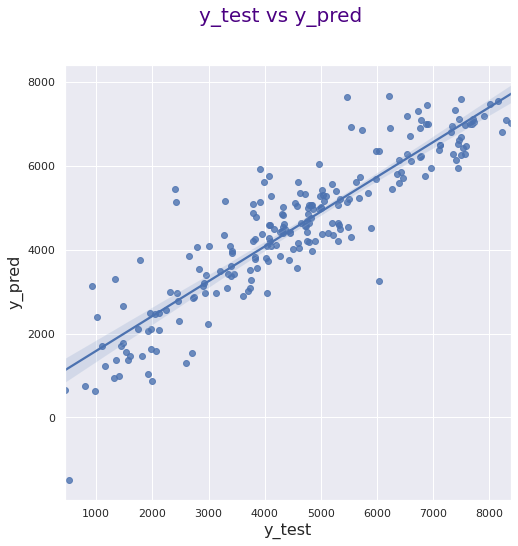

In [157]:
# Plotting y_test Vs y_pred to understand the spread

fig = plt.figure(figsize=(8, 8))

sns.regplot(y_test,y_pred_m6)

fig.suptitle('y_test vs y_pred', fontsize=20,color= "indigo")
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)

A positive linear relationship between the y_test and y_pred indicates that the final model will be a good predictor of the business.

In [158]:
from sklearn.metrics import r2_score
#evaluate
r2_score(y_test,y_pred = y_pred_m6)

0.8162913619942513

# <span style="color:IndianRed ;">12.Conclusion

1. The user count is highly dependent on Teperature or Apparent Temperature. 
2. The number of bike user has increased relatively from past year, evident that the business have a better opportunity in coming years.
3. The business needs to improve their strategy, towards end and start of the year, considering the weather and season factor, the business is hit on this part of the year.
4. The business on holidays are relatively better than on a workingday, the working day business can be improved with the docks being built near office permises.
5. The windspeed and light rain weathers are quite impacting the business, and boom bike needs to look for improvements in this area.

The R2 score of training and test data are 83.6 and 81.6 respactively, which is quite good.

Overall we have a decent model showing a positive growth as we see the increase in business up the coming years, though it is understandable that some external factors like pandemic after effect, entry of low budget vehicles will impact the business in future.